In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [ ]:
# Load dataset
data = make_regression(n_samples=50, n_features=1, n_informative=1, random_state=42)

# Reshape y to make it 2D before using np.hstack
result = np.hstack((data[0], data[1].reshape(-1, 1)))

# Convert to DataFrame and set column names
df = pd.DataFrame(result, columns=['Feature', 'Target'])

# Display the DataFrame
df.head()

,Feature,Target
0,0.196861,2.774252
1,-1.220844,-17.204645
2,1.523030,21.463180
3,-1.412304,-19.902780
4,1.465649,20.654542


In [9]:
X = df['Feature'].values.reshape(-1, 1)
X[:5]

array([[ 0.19686124],
       [-1.22084365],
       [ 1.52302986],
       [-1.4123037 ],
       [ 1.46564877]])

In [12]:
y = df['Target'].values.reshape(-1, 1)
y[:5]

array([[  2.77425171],
       [-17.20464452],
       [ 21.46318021],
       [-19.90278045],
       [ 20.65454168]])

#### Visualize data

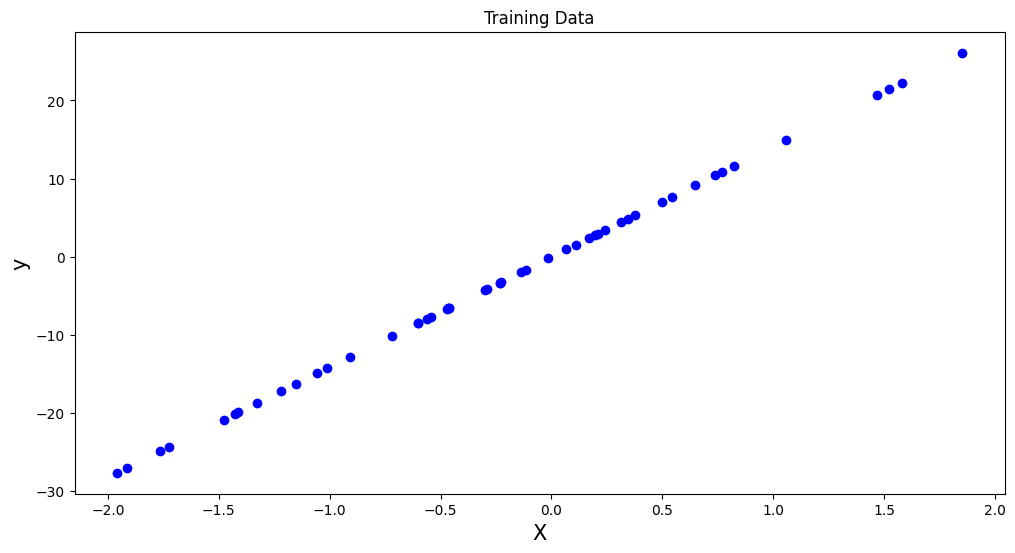

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='b')
plt.ylabel('y', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.title('Training Data')
plt.show()

#### Transform to tensors

In [14]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

#### nn model

In [15]:
model = nn.Sequential(
    nn.Linear(1, 1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

## Setting the parameters

#### Custom loss function
- MSE = (1/n)*SUM((y-y_pred)^2)
- MAE = (1/n)*SUM(abs(y-y_pred))
    - Our custom loss function = MSE + MAE

In [16]:
class Custom_Loss_function(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, ypred, y):
        # MSE
        MSE = torch.mean((ypred - y)**2)
        # MAE
        MAE = torch.mean(torch.abs(ypred - y))
        
        # MSE + MAE
        return (MSE + MAE)

#### Setting Parameters

In [17]:
learningRate = 0.001
lossfunc = Custom_Loss_function()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate,)

#### Training Neural Network

In [18]:
epochs = 5000
losses = torch.zeros(epochs)

for epoch in range(epochs):
    # Forward propagation
    ypred = model(X)
    loss = lossfunc(ypred, y)

    # Backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record the loss
    losses[epoch] = loss.detach()

    if epoch % 250 == 0:
        print(f'Epoch: {epoch}; Loss: {loss.item():.4f}')

Epoch: 0; Loss: 191.0729
Epoch: 250; Loss: 75.3290
Epoch: 500; Loss: 31.2391
Epoch: 750; Loss: 13.5486
Epoch: 1000; Loss: 6.0364
Epoch: 1250; Loss: 2.7232
Epoch: 1500; Loss: 1.2076
Epoch: 1750; Loss: 0.4953
Epoch: 2000; Loss: 0.1544
Epoch: 2250; Loss: 0.0007
Epoch: 2500; Loss: 0.0007
Epoch: 2750; Loss: 0.0006
Epoch: 3000; Loss: 0.0006
Epoch: 3250; Loss: 0.0006
Epoch: 3500; Loss: 0.0005
Epoch: 3750; Loss: 0.0005
Epoch: 4000; Loss: 0.0005
Epoch: 4250; Loss: 0.0005
Epoch: 4500; Loss: 0.0005
Epoch: 4750; Loss: 0.0005


In [19]:
ypred

tensor([[  2.7747],
        [-17.2040],
        [ 21.4635],
        [-19.9021],
        [ 20.6549],
        [  3.4103],
        [ -3.2990],
        [ -8.4789],
        [ 26.1034],
        [  7.6464],
        [  1.5637],
        [  4.4290],
        [-18.7167],
        [-26.9621],
        [-24.8448],
        [ 10.4072],
        [-12.7957],
        [-16.2197],
        [ -3.1812],
        [ -4.1101],
        [ -8.4639],
        [  9.1279],
        [-14.9051],
        [ -6.4910],
        [  0.9521],
        [ -7.9234],
        [ -1.6293],
        [ -1.9480],
        [ -6.5627],
        [-27.6158],
        [  4.8429],
        [-10.1438],
        [  5.2950],
        [ -3.2993],
        [ -0.1897],
        [  2.9439],
        [ 11.5921],
        [  2.4155],
        [-14.2726],
        [ -6.5301],
        [ -4.2427],
        [ 10.8154],
        [ 14.8978],
        [-20.0775],
        [ -6.6155],
        [ 22.2553],
        [ -7.6711],
        [  7.0004],
        [-20.8353],
        [-24.3076]],

#### Loss vs Epoch

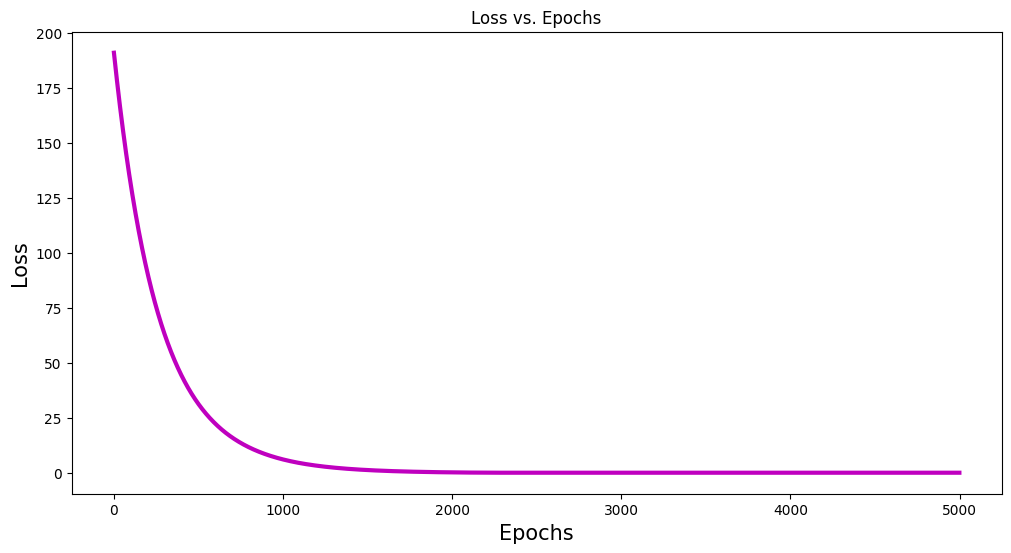

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs), losses.detach(), 'm', lw=3)
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('Loss vs. Epochs')
plt.show()

#### Weights and Bias of training model

In [21]:
# We have only 1 layer
print(f"Trained Weight: {model[0].weight.detach().numpy()}")
print(f"Trained Bias: {model[0].bias.detach().numpy()}")

Trained Weight: [[14.092546]]
Trained Bias: [-0.00049888]


#### Create test data

In [22]:
test_data = np.linspace(-3, 3, 50).reshape(-1, 1)
X_test = torch.tensor(test_data, dtype=torch.float32)
y_test = model(X_test)

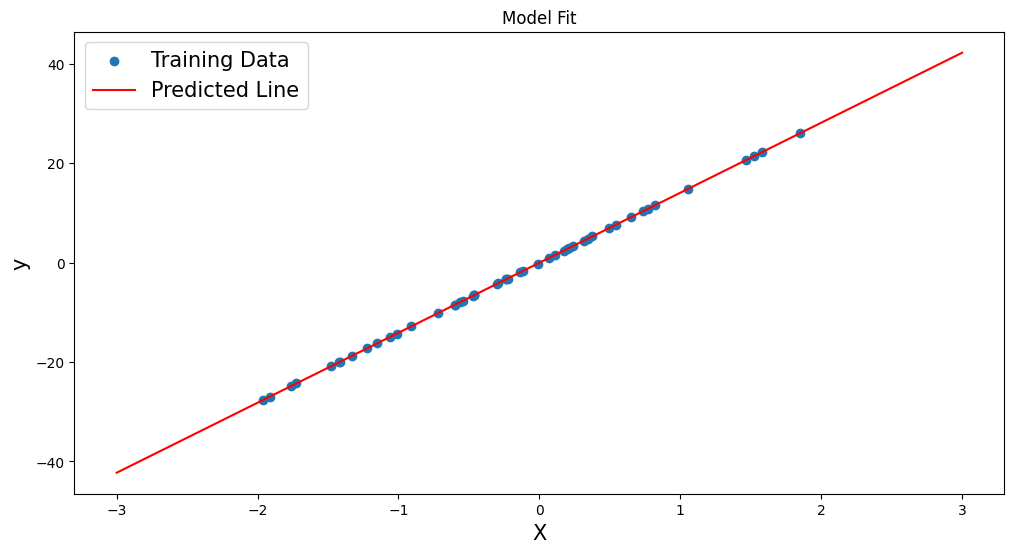

In [24]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Training Data')
plt.plot(X_test, y_test.detach(), 'r', label='Predicted Line')
plt.legend(fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.title('Model Fit')
plt.show()

#### Performance

In [25]:
from sklearn import metrics
print(f'Training Data RMSE: {np.sqrt(metrics.mean_squared_error(y.detach().numpy(), y_test.detach().numpy())):.4f}')
print(f'Training Data MAE: {metrics.mean_absolute_error(y.detach().numpy(), y_test.detach().numpy()):.4f}')
print(f'Training Data R²: {metrics.r2_score(y.detach().numpy(), y_test.detach().numpy()):.4f}')

Training Data RMSE: 29.0559
Training Data MAE: 22.9581
Training Data R²: -3.9761
